# Аналитика в российской авиакомпании «F9»

###### Цель: 
определить предпочтения пользователей авиаперевозок.

###### План:
- 1) Выгрузить данные.Определение в данных ошибок, аномальных показателей и пропусков. 
- 2) Предобработка данных если есть такая необходимость.
- 3) Исследовательский анализ.
- 4) Общий вывод.

### 1) Выгрузить данные.Определение в данных ошибок, аномальных показателей и пропусков. 

In [1]:
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
models_and_flights = pd.read_csv('/datasets/query_1.csv')
display(models_and_flights)
models_and_flights.info()
models_and_flights.describe()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [3]:
cities_and_avg_flights = pd.read_csv('/datasets/query_3.csv')
display(cities_and_avg_flights)
cities_and_avg_flights.info()
cities_and_avg_flights.describe()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


#### Вывод:
В нашем распоряжении две таблицы.В одной данные о количество рейсов для каждой модели самолетов в сентябре 2018 года.В другой 
среднее количестве рейсов, прибывающих в город за день в сентябре 2018 года.
Проведя первичное ознакомление с данными можно сказать что данных не много, но качество данных хорошее.А именно нет пропусков, аномальных значений и дубликатов.Предобработка данных не потребуется.

### 3) Исследовательский анализ.

Определим первые 10 городов с наибольшим средним количестсвом рейсов в сентябре 2018.

In [4]:
top_10_cities_and_avg_flights = cities_and_avg_flights.sort_values(by = 'average_flights', ascending = False)
top_10_cities_and_avg_flights.head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


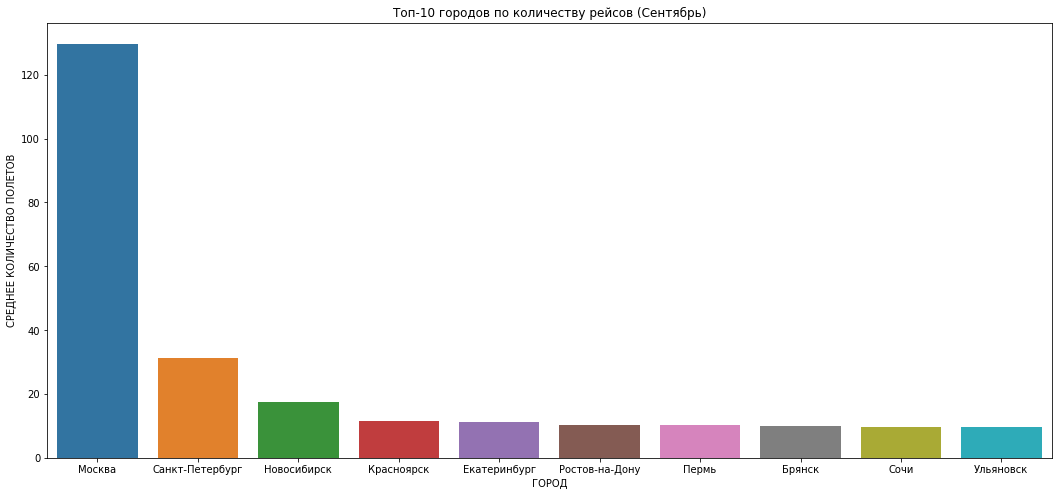

In [5]:
plt.rcParams['figure.figsize'] = [18,8]
top_10 = top_10_cities_and_avg_flights.head(10)
sns.barplot (x = 'city', y ='average_flights', data = top_10) 
plt.xlabel('ГОРОД')
plt.ylabel('СРЕДНЕЕ КОЛИЧЕСТВО ПОЛЕТОВ')
plt.title('Топ-10 городов по количеству рейсов (Сентябрь)');

#### Вывод:
Можно с уверенность сказать что лидером с большим отрывом по среднему количесту рейсов в день является город Москва.Второе и третье место занимают Санкт-Петербург и Новосибирск.Скорее всего это связанно на прямую с количеством людей проживающих в этих городах.Особенно это касается Москвы.Так же сентябрь это окончание туристического сезона( многие возвращаются из отпусков), это начало учебного года(начинают работу школы, высшие учебные заведения). 

Определим самые популярные модели самолетов. 

In [6]:
display(models_and_flights)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Airbus A319-100 - максимальное количество пассажиров 156, максимальная дальность полета - 6845 км.

Airbus A321-200 - максимальное количество пассажиров 220, максимальная дальность полета - 3800  км.

Boeing 737-300  - максимальное количество пассажиров 149, максимальная дальность полета - 2900 км.

Boeing 767-300  - максимальное количество пассажиров 328, максимальная дальность полета - 9700 км.

Boeing 777-300  - максимальное количество пассажиров 368, максимальная дальность полета - 11000 км.

Bombardier CRJ-200 - максимальное количество пассажиров 50, максимальная дальность полета - 1800 км.

Cessna 208 Caravan - максимальное количество пассажиров 13, максимальная дальность полета - 1797 км.

Sukhoi SuperJet-100 - максимальное количество пассажиров 103, максимальная дальность полета - 3 048 км.

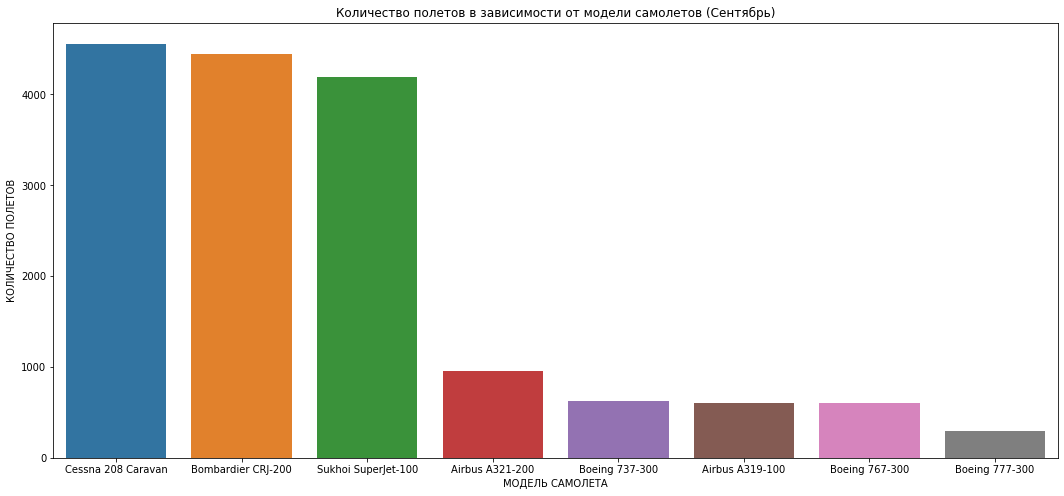

In [7]:
models_and_flights = models_and_flights.sort_values(by ='flights_amount', ascending = False)
sns.barplot (x = 'model', y ='flights_amount', data = models_and_flights) 
plt.xlabel('МОДЕЛЬ САМОЛЕТА')
plt.ylabel('КОЛИЧЕСТВО ПОЛЕТОВ')
plt.title('Количество полетов в зависимости от модели самолетов (Сентябрь)');

#### Вывод:
Судя по нашим данным и графику, наиболее популярными самолетами являются модели с наименьшим количеством пассажиров, и с небольшой дальностью полета.Если предположить что уровень цен авиабилетов на этих моделях самолетов больше среднего,это говорит нам о том что акцент авиакомпании делается на перевозку пассажиров первого и бизнес классов.

Посмотрим на респредление рейсов по каждому городу.

In [8]:
cities_and_avg_flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


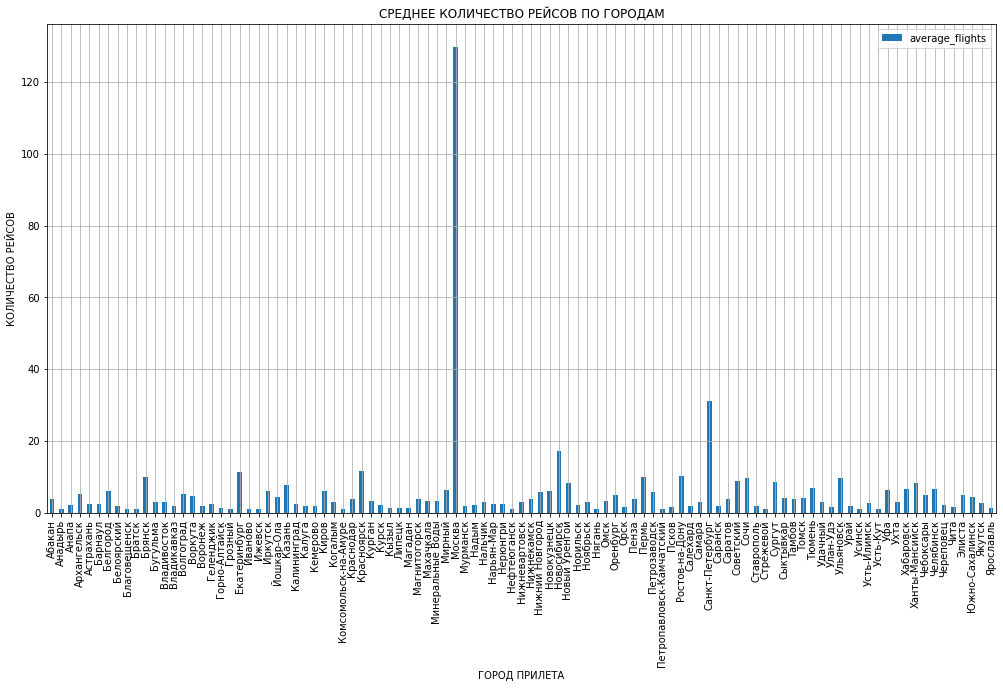

In [11]:
cities_and_avg_flights.plot(x ='city',y ='average_flights', kind = 'bar', figsize = (17,9), grid = True)
plt.ylabel('КОЛИЧЕСТВО РЕЙСОВ')
plt.xlabel('ГОРОД ПРИЛЕТА')
plt.title ('СРЕДНЕЕ КОЛИЧЕСТВО РЕЙСОВ ПО ГОРОДАМ');

#### Вывод:
В среднем каждый день в сентябре в каждый город делается по 3 рейса.(конечно же за исключением Москвы и Санкт-Петербурга).
Это говорит нам о том что авиаперелеты в регионы России (за исключением столицы и СПб),не достаточно популярны и не так сильно развиты.Можно так же предположить что люди проживающие в других регионах не могут себе позволить авиаперелеты, а так же сами регионы обладают маленькой туристической и бизнес приклекательностью. 

### 4) Общий вывод

Исходя из наших результатов можно сделать следующие выводы:
- 1) Предпочтительными направлениями среди пассажиров в сентябре является Москва, Санкт-Петербург, Новосибирск, Сочи,Брянск,Красноярск
- 2) Чаще всего используются самолеты с маленькими характеристиками касательно числа пассажиров и дальности полетов.
- 3) Исходя из вывода номер 2, можно предположить что акцент авиакомпаний направлен на дорогие авиаперевозки, и на vip класс среди пассажиров. 